In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv",header=None)

In [3]:
train_data=dataset.iloc[0:700]
varid_data=dataset.iloc[700:768]

In [4]:
X_train=train_data[[0,1,2,3,4,5,6,7]].values
y_train=train_data[8].values
X_val=varid_data[[0,1,2,3,4,5,6,7]].values
y_val=varid_data[8].values

In [15]:
class logistic:
    def __init__(self,patience=6,epochs=1000,batchsize=30,delta=0.01,lr=0.01):
        self.patience=patience
        self.epochs=epochs
        self.batchsize=batchsize
        self.delta=delta
        self.lr=lr
        self.weight=None
        self.bias=None
        self.best_weight=None
        self.best_bias=None
        self.best_loss=None
        self.val_loss_history=[]
        self.train_loss_hist=[]
        self.wait=0
        self.early_stop=False
    def sigmoid(self,z):
        z=np.clip(z,-500,500)
        return 1/(1+np.exp(-z))
    def train(self,X_train,y_train,X_val,y_val):
        n_sample_train,n_feature_train=X_train.shape
        # n_sample_val,n_feature_val=X_val.shape

        np.random.seed(42)
        self.weight=np.random.randn(n_feature_train)
        self.bias=np.random.randn()

        X_train=(X_train-X_train.mean())/X_train.std()+1e-8
        X_val=(X_val-X_val.mean())/X_val.std()+1e-8

        for i in range(self.epochs):
            indices=np.random.permutation(n_sample_train)
            X_shaffle=X_train[indices]
            y_shaffle=y_train[indices]
            for _ in range(0,n_sample_train,self.batchsize):
                X_batch=X_shaffle[i:i+self.batchsize]
                y_batch=y_shaffle[i:i+self.batchsize]
                n_sample_batch=len(X_batch)

                z=np.dot(X_batch,self.weight)+ self.bias
                y_predi=self.sigmoid(z)
                error=y_predi-y_batch

                gradient_weight =(1/n_sample_batch)*np.dot(X_batch.T,error)
                gradient_bias  =(1/n_sample_batch) *np.sum(error)

                self.weight -= self.lr*gradient_weight
                self.bias -= self.lr*gradient_bias

                loss_train =-np.mean(y_batch*np.log(y_predi +1e-15) +(1-y_batch)*np.log(1-y_predi +1e-15))
                self.train_loss_hist.append(loss_train)

            z1=np.dot(X_val,self.weight) +self.bias
            y_predi_val=self.sigmoid(z1)
            loss_val = -np.mean(y_val*np.log(y_predi_val) +(1-y_val +1e-15)*np.log(1-y_predi_val +1e-15))
            self.val_loss_history.append(loss_val)

            if self.best_loss is None or loss_val < self.best_loss -self.delta:
                self.best_loss=loss_val
                self.best_weight =np.copy(self.weight)
                self.best_bias =np.copy(self.bias)
                self.wait=0
            else:
                self.wait +=1
                if self.wait >=self.patience:
                    print(f"early stopping at epoch {i}")
                    self.early_stop=True
                    break
        if self.best_weight is not  None:
            self.weight=self.best_weight
            self.bias=self.best_bias
            
            

                
                

In [16]:
model= logistic()

In [17]:
model.train(X_train,y_train,X_val,y_val)

early stopping at epoch 28


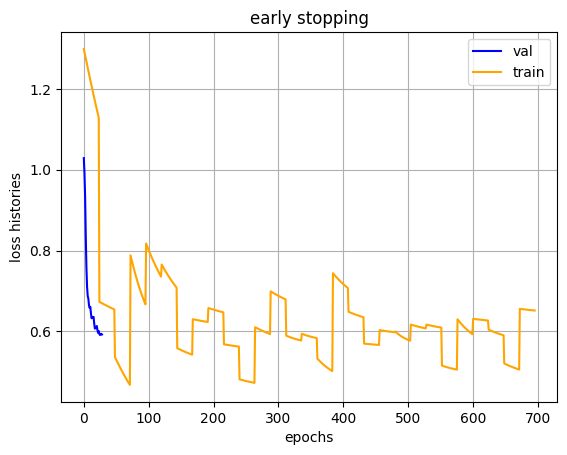

In [20]:
plt.plot(model.val_loss_history,label='val',color='blue')
plt.plot(model.train_loss_hist,label='train',color='orange')
plt.xlabel('epochs')
plt.ylabel('loss histories')
plt.grid(True)
plt.legend()
plt.title('early stopping')
plt.show()